In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as ex

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Load Datasets**

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
df = pd.read_csv(url)
df.sample(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
400,401,24,2,3,24,2.173,2.411,0.0,NBA001,19.1
282,283,41,1,15,120,2.659,0.821,0.0,NBA014,2.9
116,117,30,1,4,18,0.227,1.699,0.0,NBA002,10.7
839,840,31,1,8,22,0.370,1.104,0.0,NBA001,6.7
675,676,42,2,21,121,1.365,2.386,0.0,NBA011,3.1


**Checking data info and missing values**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


**Categorical feature conversion**

In [23]:
cat_features = df.select_dtypes(include='object').columns.to_list()
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_df = df[cat_features]
encoded_data = encoder.fit_transform(cat_df)
encoded_dff = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features))
encoded_df = pd.concat([df.drop(columns=cat_features), encoded_dff], axis=1)
encoded_df = encoded_df.dropna()

**Lets separate data and Normalize datas**

In [33]:
X = encoded_df.values[:, 1:] # Exclude customer ID
norm_data = StandardScaler().fit_transform(X)

**Model Building**

In [36]:
model = KMeans(init='k-means++', 
               n_clusters=3, 
               n_init=12)
model.fit(X)
cluster_label = model.labels_
cluster_center = model.cluster_centers_

We assign the k-means cluster labels to each row in the dataframe.

In [37]:
encoded_df['Clust_labels'] = cluster_label

In [38]:
encoded_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Address_NBA001,...,Address_NBA023,Address_NBA024,Address_NBA025,Address_NBA026,Address_NBA027,Address_NBA029,Address_NBA030,Address_NBA031,Address_NBA034,Clust_labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


We can easily check the centroid values by averaging the features in each cluster. These values indicate the central point of the cluster from the vantage point of the field in question.

In [39]:
encoded_df.groupby('Clust_labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Address_NBA001,...,Address_NBA022,Address_NBA023,Address_NBA024,Address_NBA025,Address_NBA026,Address_NBA027,Address_NBA029,Address_NBA030,Address_NBA031,Address_NBA034
Clust_labels,,,,,,,,,,,,,,,,,,,,,
0,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387,0.045161,...,0.025806,0.019355,0.006452,0.025806,0.019355,0.006452,0.006452,0.0,0.006452,0.006452
1,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893,0.094162,...,0.005650,0.009416,0.003766,0.003766,0.005650,0.003766,0.000000,0.0,0.001883,0.000000
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.0,0.000000,0.000000


Now, let's look at the distribution of customers based on their education, age and income. We can choose to visualise this as a 2D scatter plot with Age on the x-axis, Income on the y-axis and the marker size representing education. The scatter points will be assigned different colors based on different class labels.

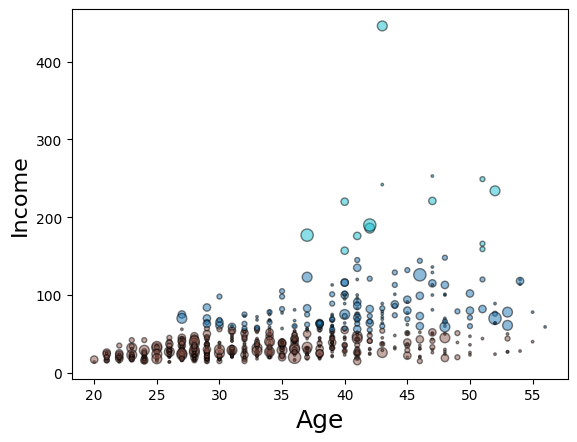

In [41]:
area = np.pi*(X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=cluster_label.astype(float), cmap='tab10', ec='k', alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()